In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("multiple_linear_regression.csv")

In [3]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.isna().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [5]:
df.describe()

,Feature 1,Feature 2,Feature 3,Target
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.dtypes

Feature 1    float64
Feature 2    float64
Feature 3    float64
Target       float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.sample(10)

,Feature 1,Feature 2,Feature 3,Target
153,171.3,39.7,37.7,19.0
178,276.7,2.3,23.7,11.8
22,13.2,15.9,49.6,5.6
81,239.8,4.1,36.9,12.3
94,107.4,14.0,10.9,11.5
6,57.5,32.8,23.5,11.8
117,76.4,0.8,14.8,9.4
97,184.9,21.0,22.0,15.5
13,97.5,7.6,7.2,9.7
147,243.2,49.0,44.3,25.4


<Axes: xlabel='Feature 1', ylabel='Target'>

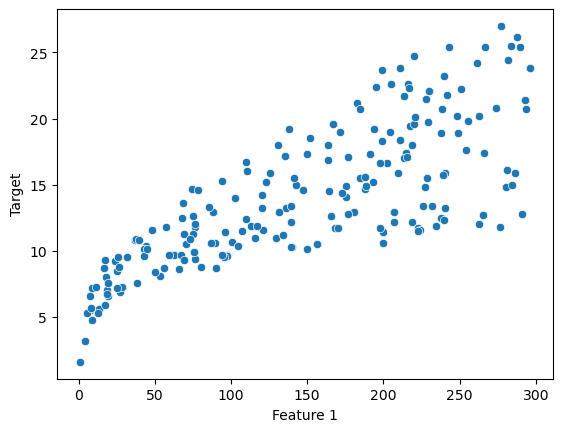

In [9]:
sns.scatterplot(x="Feature 1",y="Target",data=df)

<Axes: xlabel='Feature 1', ylabel='Target'>

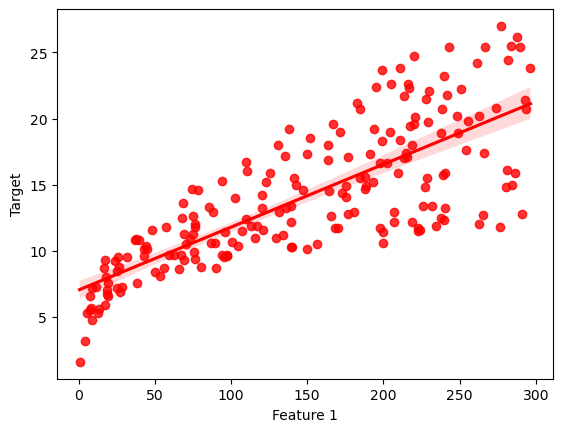

In [10]:
sns.regplot(x="Feature 1",y="Target",data=df,color="r")

<Axes: xlabel='Feature 2', ylabel='Target'>

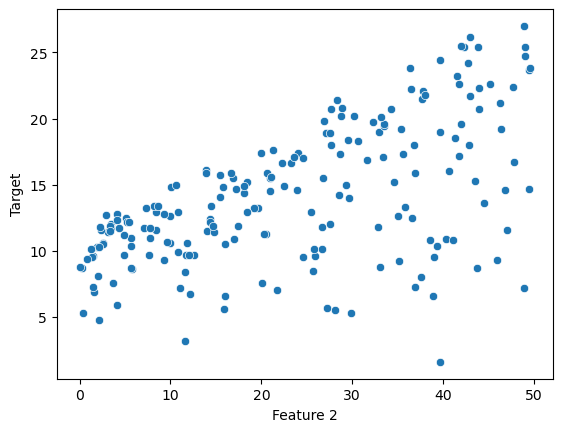

In [11]:
sns.scatterplot(x="Feature 2",y="Target",data=df,markers=True)

<Axes: xlabel='Feature 3', ylabel='Target'>

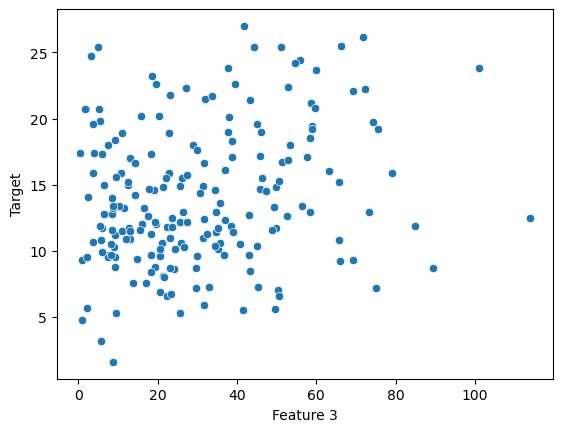

In [12]:
sns.scatterplot(x="Feature 3",y="Target",data=df)

In [13]:
df.corr()

,Feature 1,Feature 2,Feature 3,Target
Feature 1,1.000000,0.054809,0.056648,0.782224
Feature 2,0.054809,1.000000,0.354104,0.576223
Feature 3,0.056648,0.354104,1.000000,0.228299
Target,0.782224,0.576223,0.228299,1.000000


In [14]:
x = df.iloc[:, df.columns != "Target"]


In [15]:
y=df[["Target"]]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.30, random_state = 43)

In [17]:
len(x_train)

140

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [20]:
mlr.coef_

array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [21]:
mlr.intercept_

array([3.0777745])

In [22]:
test_predictions=mlr.predict(x_test)

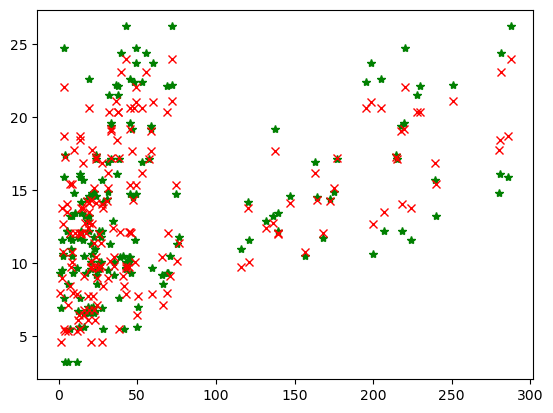

In [23]:

plt.plot(x_test,y_test,"*",color="green")
plt.plot(x_test,test_predictions,"x",color="red")
   

In [24]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(test_predictions,y_test)
cost

2.2412862530933473

In [25]:
mlr.score(x_test,y_test)

0.9220854203535253

In [26]:
for i in range(len(y_test)):
    print(f"prediction={test_predictions[i]} actual={np.array(y_test)[i]}")
    


prediction=[8.41710143] actual=[5.5]
prediction=[15.36146115] actual=[14.7]
prediction=[12.08619274] actual=[13.4]
prediction=[9.75953058] actual=[11.]
prediction=[11.37799221] actual=[11.8]
prediction=[18.73526253] actual=[15.9]
prediction=[23.94158412] actual=[26.2]
prediction=[7.11931733] actual=[8.6]
prediction=[22.06606191] actual=[24.7]
prediction=[16.83172907] actual=[15.7]
prediction=[7.93115903] actual=[9.3]
prediction=[23.07243791] actual=[24.4]
prediction=[19.15729792] actual=[19.6]
prediction=[5.47677475] actual=[7.6]
prediction=[15.42102256] actual=[13.2]
prediction=[9.82205717] actual=[10.1]
prediction=[12.08023645] actual=[11.7]
prediction=[9.76094922] actual=[10.1]
prediction=[21.07717663] actual=[22.2]
prediction=[9.13945016] actual=[10.5]
prediction=[20.36205828] actual=[22.1]
prediction=[12.03862691] actual=[9.3]
prediction=[13.78082146] actual=[11.6]
prediction=[10.73225482] actual=[10.5]
prediction=[16.20061541] actual=[16.9]
prediction=[7.77042699] actual=[7.]
pre

In [29]:
100-np.mean(np.abs(test_predictions-y_test))

98.77877006191007